# Read DENUE file

## Import libraries

In [120]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os

## Zona limite

<Axes: >

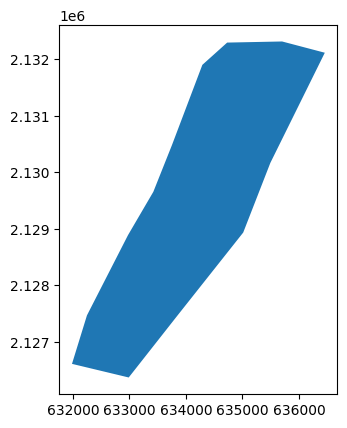

In [121]:
limite = gpd.read_file('qgis\zona_limite.gpkg')
limite = limite.to_crs('EPSG:32613')
limite.plot()

## Denue file

In [122]:
df_full = gpd.read_file('data\denue_2023.gpkg')
df_full = df_full.to_crs('EPSG:32613')
df_full.head()

,d_llave,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ageb,manzana,nom_estab,...,nomb_asent,tipocencom,nom_cencom,telefono,tipounieco,nic,nop,tipo_ue,clee,geometry
0,3513760.0,06,COLIMA,002,COLIMA,0001,Colima,0746,028,FARMACIA DE LA CRUZ,...,None,None,None,None,None,None,None,None,None,POINT (634094.417 2128023.541)
1,2574899.0,06,COLIMA,002,COLIMA,0001,Colima,1458,016,FARMACIA GENERICOS MI SALUD,...,None,None,None,None,None,None,None,None,None,POINT (632418.144 2127299.749)
2,4185355.0,06,COLIMA,002,COLIMA,0001,Colima,0746,034,FARMACIA GUADALUPANA DE COLIMA,...,None,None,None,None,None,None,None,None,None,POINT (633747.834 2128125.142)
3,4186049.0,06,COLIMA,002,COLIMA,0001,Colima,0746,028,FARMACIAS GUADALAJARA,...,None,None,None,None,None,None,None,None,None,POINT (633948.914 2128077.523)
4,2935124.0,06,COLIMA,002,COLIMA,0001,Colima,0746,022,FARMACIA ZAPOTLAN,...,None,None,None,None,None,None,None,None,None,POINT (634129.486 2128056.984)


<Axes: >

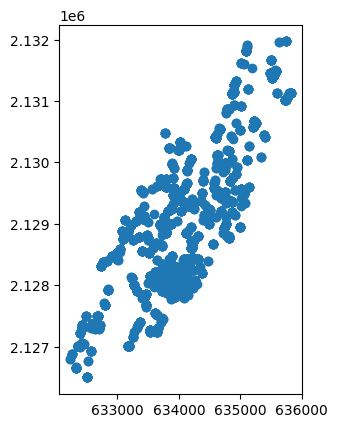

In [123]:
df_full.plot()

In [124]:
columns_to_ignore = [
  'cve_ent', 'entidad', 'cve_mun', 'municipio','tipo_calle','calle', 'tipo_vial1', 
  'calle_1', 'tipo_vial2', 'calle_2', 'tipo_vial3','calle_3', #'numero_ext', 
  'edificio', 'numero_int', 'tipo_asent','colonia', 'cod_postal', 'telefono1', 
  'telefono2', 'ext_tel1','ext_tel2', 'fax','num_local','correoelec', 'www', 
  'correoele2','latitud', 'longitud','index_right', 'id', 'per_ocu', 'tipo_vial', 
  'nom_vial', 'tipo_v_e_1', 'nom_v_e_1','tipo_v_e_2', 'nom_v_e_2', 'tipo_v_e_3', 
  'nom_v_e_3', 'letra_ext','edificio_e', 'letra_int', 'nomb_asent', 'tipocencom', 
  'nom_cencom','telefono', 'tipounieco',  'nic', 'nop', "tipo_estab", 'clee',
  'tipo_ue', "centro_com", "raz_social","est_perocu","nom_propie","d_llave","des_perocu",
  "estatus"]

In [125]:
df_with_columns = df_full.drop(columns_to_ignore, axis=1)
print(df_with_columns.columns)

Index(['cve_loc', 'localidad', 'ageb', 'manzana', 'nom_estab', 'numero_ext',
       'codigo_act', 'nombre_act', 'alta', 'geometry'],
      dtype='object')


In [126]:
df_with_columns.sort_values(by=["ageb","manzana", "numero_ext"], inplace=True)

In [127]:
# check duplicates in agenb and manzana

df_with_columns["agebmanzana"] = df_with_columns["ageb"] + df_with_columns["manzana"] + df_with_columns["numero_ext"].astype(str)

In [128]:
df_with_columns.drop_duplicates(subset=["agebmanzana"], inplace=True)

In [129]:
df_with_columns.localidad.unique()

array(['CIUDAD DE VILLA DE Ã\x81LVAREZ', 'Ciudad de Villa de Álvarez',
       'COLIMA', 'Colima'], dtype=object)

In [130]:
print(len(df_with_columns.nom_estab.unique()))


330


In [131]:
import editdistance

string1 = 'INSTITO TECNOLÃ“GICO DE COLIMA'
string2 = 'INSTITO TECNOLOGICO DE COLIMA'
string3 = 'INSTITO TECNOLÓGICO DE COLIMA'

# Compute the Levenshtein distance between all pairs of strings
dist12 = editdistance.eval(string1, string2)
dist13 = editdistance.eval(string1, string3)
dist23 = editdistance.eval(string2, string3)

# Define a threshold for similarity/duplicates
threshold = 5

# Check if any pair of strings is below the threshold
if dist12 <= threshold or dist13 <= threshold or dist23 <= threshold:
    print("The strings are similar or duplicates.")
else:
    print("The strings are not similar or duplicates.")

The strings are similar or duplicates.


In [132]:
# set these columns as lower case [localidad, nom_estab, nombre_act]
df_with_columns["localidad"] = df_with_columns["localidad"].str.title()
df_with_columns["nom_estab"] = df_with_columns["nom_estab"].str.title()
df_with_columns["nombre_act"] = df_with_columns["nombre_act"].str.title()

In [133]:
threshold = 5
strings = df_with_columns.nom_estab.unique()
for s in strings:
    for s_row in df_with_columns.nom_estab:
        dist = editdistance.eval(s, s_row)
        if dist <= threshold:
            df_with_columns.nom_estab.replace(s_row, s, inplace=True)

In [134]:
locs = df_with_columns.localidad.unique()
for loc in locs:
    for s_row in df_with_columns.localidad:
        dist = editdistance.eval(loc, s_row)
        if dist <= threshold:
            df_with_columns.localidad.replace(s_row, loc, inplace=True)

In [135]:
acts = df_with_columns.nombre_act.unique()
for act in acts:
    for s_row in df_with_columns.nombre_act:
        dist = editdistance.eval(act, s_row)
        if dist <= threshold:
            df_with_columns.nombre_act.replace(s_row, act, inplace=True)

In [136]:
df_with_columns.head()

,cve_loc,localidad,ageb,manzana,nom_estab,numero_ext,codigo_act,nombre_act,alta,geometry,agebmanzana
376,0001,Ciudad De Villa De Álvarez,0273,001,Instito Tecnológico De Colima,1,611312,Escuelas De Educación Superior Del Sector Privado,JULIO 2010,POINT (634020.879 2130335.308),02730011
103,0001,Ciudad De Villa De Álvarez,0273,001,Instito Tecnológico De Colima,24A,611312,Escuelas De Educación Superior Del Sector Privado,JULIO 2010,POINT (634113.451 2130263.808),027300124A
1271,0001,Ciudad De Villa De Álvarez,0288,024,Instito Tecnológico De Colima,1,611312,Escuelas De Educación Superior Del Sector Privado,2010-07,POINT (634020.878 2130335.308),02880241
206,0001,Colima,0318,003,Farmacia Zapotlan,555,464112,Farmacias Sin Minisãºper,DICIEMBRE 2014,POINT (634470.707 2129245.509),0318003555
27,0001,Colima,0318,004,Farmacias Guadalajara,108,464112,Farmacias Sin Minisãºper,JULIO 2010,POINT (634249.431 2129244.757),0318004108


In [137]:
df_with_columns = gpd.GeoDataFrame(df_with_columns, geometry='geometry', crs='EPSG:32613')
df_with_columns.reset_index(inplace=True, drop=True)
print(df_with_columns.shape)
df_with_columns.head()

(378, 11)


,cve_loc,localidad,ageb,manzana,nom_estab,numero_ext,codigo_act,nombre_act,alta,geometry,agebmanzana
0,0001,Ciudad De Villa De Álvarez,0273,001,Instito Tecnológico De Colima,1,611312,Escuelas De Educación Superior Del Sector Privado,JULIO 2010,POINT (634020.879 2130335.308),02730011
1,0001,Ciudad De Villa De Álvarez,0273,001,Instito Tecnológico De Colima,24A,611312,Escuelas De Educación Superior Del Sector Privado,JULIO 2010,POINT (634113.451 2130263.808),027300124A
2,0001,Ciudad De Villa De Álvarez,0288,024,Instito Tecnológico De Colima,1,611312,Escuelas De Educación Superior Del Sector Privado,2010-07,POINT (634020.878 2130335.308),02880241
3,0001,Colima,0318,003,Farmacia Zapotlan,555,464112,Farmacias Sin Minisãºper,DICIEMBRE 2014,POINT (634470.707 2129245.509),0318003555
4,0001,Colima,0318,004,Farmacias Guadalajara,108,464112,Farmacias Sin Minisãºper,JULIO 2010,POINT (634249.431 2129244.757),0318004108


In [138]:
df_with_columns.drop_duplicates(subset=["ageb","nom_estab"], inplace=True)
print(df_with_columns.shape)
df_with_columns.head()

(310, 11)


,cve_loc,localidad,ageb,manzana,nom_estab,numero_ext,codigo_act,nombre_act,alta,geometry,agebmanzana
0,0001,Ciudad De Villa De Álvarez,0273,001,Instito Tecnológico De Colima,1,611312,Escuelas De Educación Superior Del Sector Privado,JULIO 2010,POINT (634020.879 2130335.308),02730011
2,0001,Ciudad De Villa De Álvarez,0288,024,Instito Tecnológico De Colima,1,611312,Escuelas De Educación Superior Del Sector Privado,2010-07,POINT (634020.878 2130335.308),02880241
3,0001,Colima,0318,003,Farmacia Zapotlan,555,464112,Farmacias Sin Minisãºper,DICIEMBRE 2014,POINT (634470.707 2129245.509),0318003555
4,0001,Colima,0318,004,Farmacias Guadalajara,108,464112,Farmacias Sin Minisãºper,JULIO 2010,POINT (634249.431 2129244.757),0318004108
5,0001,Colima,0318,004,1027 Colima 4,140,464111,Farmacias Sin Minisãºper,JULIO 2010,POINT (634190.274 2129292.585),0318004140


In [139]:
df_with_columns.drop_duplicates(subset=["numero_ext","nom_estab"], inplace=True)
print(df_with_columns.shape)
df_with_columns.head()

(307, 11)


,cve_loc,localidad,ageb,manzana,nom_estab,numero_ext,codigo_act,nombre_act,alta,geometry,agebmanzana
0,0001,Ciudad De Villa De Álvarez,0273,001,Instito Tecnológico De Colima,1,611312,Escuelas De Educación Superior Del Sector Privado,JULIO 2010,POINT (634020.879 2130335.308),02730011
3,0001,Colima,0318,003,Farmacia Zapotlan,555,464112,Farmacias Sin Minisãºper,DICIEMBRE 2014,POINT (634470.707 2129245.509),0318003555
4,0001,Colima,0318,004,Farmacias Guadalajara,108,464112,Farmacias Sin Minisãºper,JULIO 2010,POINT (634249.431 2129244.757),0318004108
5,0001,Colima,0318,004,1027 Colima 4,140,464111,Farmacias Sin Minisãºper,JULIO 2010,POINT (634190.274 2129292.585),0318004140
6,0001,Colima,0318,004,Farmacia El Generico,142,464111,Farmacias Sin Minisãºper,DICIEMBRE 2014,POINT (634195.334 2129288.487),0318004142


In [140]:
# iter rows in the GeoDataFrame df_with_columns
for i in range(df_with_columns.shape[0]):
    # get the row
    row = df_with_columns.iloc[i]

    for j in range(df_with_columns.shape[0]):
        # get the row
        row2 = df_with_columns.iloc[j]
        
        distance = row.geometry.distance(row2.geometry)
        if distance < 10:
            print(row.nom_estab, row2.nom_estab, distance)
            break
    
    
    


Instito Tecnológico De Colima Instito Tecnológico De Colima 0.0
Farmacia Zapotlan Farmacia Zapotlan 0.0
Farmacias Guadalajara Farmacias Guadalajara 0.0
1027 Colima 4 1027 Colima 4 0.0
Farmacia El Generico 1027 Colima 4 6.511104444261308
Farmacia Mn Similares Farmacia Mn Similares 0.0
Escuela Primaria Rafael Briseño Ramirez Escuela Primaria Rafael Briseño Ramirez 0.0
Instituto Marcela Domene Maternal Instituto Marcela Domene Maternal 0.0
Cursos De Ingles Cursos De Ingles 0.0
Distribuciones Médicas De Occidente Distribuciones Médicas De Occidente 0.0
Upe Unidad Psico Educativa Upe Unidad Psico Educativa 0.0
Escuela De Belleza Blanche Escuela De Belleza Blanche 0.0
Escuela De Gastronomia Escuela De Gastronomia 0.0
Blanche Blanche 0.0
Centro Holistico Om-Yam Centro Holistico Om-Yam 0.0
Colegio Colima Colegio Colima 0.0
Latin Girls Pole Dance Latin Girls Pole Dance 0.0
Centro De Capacitación Tecnica Del Estado De Colima Centro De Capacitación Tecnica Del Estado De Colima 0.0
Universidad Uni

In [141]:
for i, i_row in df_with_columns.iterrows():
    for j, j_row in df_with_columns.iterrows():
        distance = i_row.geometry.distance(j_row.geometry)
        if distance < 10:
            print(i_row.nom_estab, j_row.nom_estab, distance)
            break

Instito Tecnológico De Colima Instito Tecnológico De Colima 0.0
Farmacia Zapotlan Farmacia Zapotlan 0.0
Farmacias Guadalajara Farmacias Guadalajara 0.0
1027 Colima 4 1027 Colima 4 0.0
Farmacia El Generico 1027 Colima 4 6.511104444261308
Farmacia Mn Similares Farmacia Mn Similares 0.0
Escuela Primaria Rafael Briseño Ramirez Escuela Primaria Rafael Briseño Ramirez 0.0
Instituto Marcela Domene Maternal Instituto Marcela Domene Maternal 0.0
Cursos De Ingles Cursos De Ingles 0.0
Distribuciones Médicas De Occidente Distribuciones Médicas De Occidente 0.0
Upe Unidad Psico Educativa Upe Unidad Psico Educativa 0.0
Escuela De Belleza Blanche Escuela De Belleza Blanche 0.0
Escuela De Gastronomia Escuela De Gastronomia 0.0
Blanche Blanche 0.0
Centro Holistico Om-Yam Centro Holistico Om-Yam 0.0
Colegio Colima Colegio Colima 0.0
Latin Girls Pole Dance Latin Girls Pole Dance 0.0
Centro De Capacitación Tecnica Del Estado De Colima Centro De Capacitación Tecnica Del Estado De Colima 0.0
Universidad Uni

In [142]:
df_with_columns

# create a column "class" with the options (farmacia, escuela, hospital) using the information from "nombre_act" columns
df_with_columns["class"] = df_with_columns["nombre_act"].apply(lambda x: "farmacia" if "farmacia" in x.lower() else "escuela" if "escuela" in x.lower() else "hospital" if "hospital" in x.lower() else "other")
df_with_columns.head()

,cve_loc,localidad,ageb,manzana,nom_estab,numero_ext,codigo_act,nombre_act,alta,geometry,agebmanzana,class
0,0001,Ciudad De Villa De Álvarez,0273,001,Instito Tecnológico De Colima,1,611312,Escuelas De Educación Superior Del Sector Privado,JULIO 2010,POINT (634020.879 2130335.308),02730011,escuela
3,0001,Colima,0318,003,Farmacia Zapotlan,555,464112,Farmacias Sin Minisãºper,DICIEMBRE 2014,POINT (634470.707 2129245.509),0318003555,farmacia
4,0001,Colima,0318,004,Farmacias Guadalajara,108,464112,Farmacias Sin Minisãºper,JULIO 2010,POINT (634249.431 2129244.757),0318004108,farmacia
5,0001,Colima,0318,004,1027 Colima 4,140,464111,Farmacias Sin Minisãºper,JULIO 2010,POINT (634190.274 2129292.585),0318004140,farmacia
6,0001,Colima,0318,004,Farmacia El Generico,142,464111,Farmacias Sin Minisãºper,DICIEMBRE 2014,POINT (634195.334 2129288.487),0318004142,farmacia


In [143]:
df_with_columns = gpd.GeoDataFrame(df_with_columns)
df_with_columns.to_file("data/denuefinal.gpkg")

In [144]:
df_with_columns.columns

Index(['cve_loc', 'localidad', 'ageb', 'manzana', 'nom_estab', 'numero_ext',
       'codigo_act', 'nombre_act', 'alta', 'geometry', 'agebmanzana', 'class'],
      dtype='object')

In [145]:
points = gpd.GeoSeries(df_with_columns.geometry)
points.crs = 'EPSG:32613'
points 

0      POINT (634020.879 2130335.308)
3      POINT (634470.707 2129245.509)
4      POINT (634249.431 2129244.757)
5      POINT (634190.274 2129292.585)
6      POINT (634195.334 2129288.487)
                    ...              
372    POINT (632707.436 2127311.926)
374    POINT (632486.222 2127496.419)
375    POINT (632774.059 2127706.557)
376    POINT (632672.951 2127496.318)
377    POINT (632713.815 2127345.500)
Name: geometry, Length: 307, dtype: geometry

# Datos AGEBs

In [146]:
#agebs = gpd.read_file("data/colima/06a.shp")
#agebs.crs = 'EPSG:32613'


<Axes: >

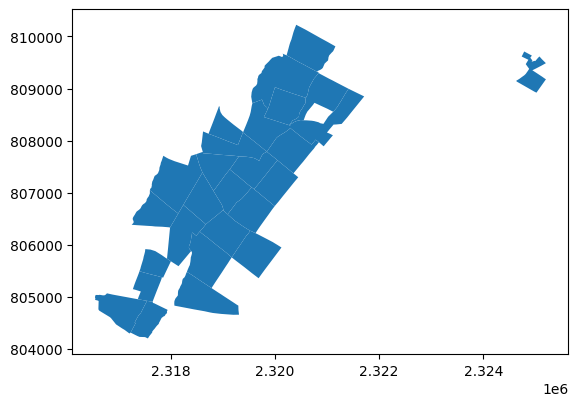

In [147]:
agebs = agebs[agebs.CVE_AGEB.isin(df_with_columns.ageb.unique())]
agebs.plot()

In [148]:
#agebs.to_file("data/colima/agebs.gpkg")
agebs = gpd.read_file("data/colima/agebs.gpkg")

# Datos del INV

In [149]:
#manzanas_inv = gpd.read_file('data/inv/INV2020_IND_PVEU_MZA_06.shp', encoding = "latin-1")
#manzanas_inv = manzanas_inv.to_crs(limite.crs)
#manzanas_inv.head()

In [150]:
#manzanas_inv2 = manzanas_inv[manzanas_inv.CVE_AGEB.isin(df_with_columns.ageb.unique())]
#print(manzanas_inv2.shape)
#manzanas_inv2.head(2)

In [151]:
# save to data/inv/inv_manzanas_roi.gpkg
#manzanas_inv2.to_file('data/inv/inv_manzanas_roi.gpkg', driver='GPKG')

In [152]:
manzanas_inv2 = gpd.read_file('data/inv/inv_manzanas_roi.gpkg', encoding = "latin-1")
manzanas_inv2.head()

,CVEGEO,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,CVE_AGEB,CVE_MZA,AMBITO,...,DRENAJEP_D,TRANSCOL_D,ACESOPER_D,ACESOAUT_D,PUESSEMI_D,PUESAMBU_D,FECHA_POLI,FECHA_INF,FECHA_CEU,geometry
0,0600200010924024,06,Colima,002,Colima,0001,Colima,0924,024,Urbana,...,Ninguna vialidad,Ninguna vialidad,RestricciÃ³n en ninguna vialidad,RestricciÃ³n en ninguna vialidad,Ninguna vialidad,Ninguna vialidad,2020,2020,2020,"POLYGON ((635997.586 2130577.804, 635999.688 2..."
1,0600200011053024,06,Colima,002,Colima,0001,Colima,1053,024,Urbana,...,Ninguna vialidad,Ninguna vialidad,RestricciÃ³n en ninguna vialidad,RestricciÃ³n en ninguna vialidad,Ninguna vialidad,Ninguna vialidad,2020,2020,2020,"POLYGON ((635867.603 2130693.522, 635838.821 2..."
2,0600200011439031,06,Colima,002,Colima,0001,Colima,1439,031,Urbana,...,Ninguna vialidad,Ninguna vialidad,RestricciÃ³n en ninguna vialidad,RestricciÃ³n en ninguna vialidad,Ninguna vialidad,Ninguna vialidad,2020,2020,2020,"POLYGON ((632442.194 2126221.660, 632495.480 2..."
3,0600200011227021,06,Colima,002,Colima,0001,Colima,1227,021,Urbana,...,Ninguna vialidad,Ninguna vialidad,RestricciÃ³n en ninguna vialidad,RestricciÃ³n en ninguna vialidad,Ninguna vialidad,Ninguna vialidad,2020,2020,2020,"POLYGON ((635452.441 2131560.977, 635472.652 2..."
4,0600200011072010,06,Colima,002,Colima,0001,Colima,1072,010,Urbana,...,Ninguna vialidad,Ninguna vialidad,RestricciÃ³n en todas las vialidade,RestricciÃ³n en todas las vialidade,Ninguna vialidad,Ninguna vialidad,2020,2020,2020,"POLYGON ((634920.751 2130539.750, 634902.750 2..."


In [153]:
cols_to_keep = ['CVEGEO','CVE_AGEB', 'POBTOT','CVE_MZA',"POB0_14_P",
                'P15A29A_P','P30A59A_P','GRAPROES', 'P_CD_P','VPH_C_EL_P','VPH_EXSA_P',
                'VPH_DREN_P',
                'RECUCALL_C','RAMPAS_C','PASOPEAT_C','BANQUETA_C',
                'CICLOVIA_C','CICLOCAR_C',
                'ALUMPUB_C','SEMAAUDI_C',
                'PARATRAN_C','DRENAJEP_C','TRANSCOL_C',
                'ARBOLES_C','ACESOAUT_C',
                'PUESSEMI_C','PUESAMBU_C', 'geometry'
                ]
manzanas_inv2 = manzanas_inv2[cols_to_keep]
manzanas_inv2.head(2)

,CVEGEO,CVE_AGEB,POBTOT,CVE_MZA,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,VPH_C_EL_P,...,ALUMPUB_C,SEMAAUDI_C,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,geometry
0,0600200010924024,0924,4,024,*,*,*,*,*,*,...,1,3,3,3,3,2,3,3,3,"POLYGON ((635997.586 2130577.804, 635999.688 2..."
1,0600200011053024,1053,8,024,*,*,*,*,*,*,...,2,3,3,3,3,1,3,3,3,"POLYGON ((635867.603 2130693.522, 635838.821 2..."


In [154]:
manzanas_inv2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CVEGEO      1016 non-null   object  
 1   CVE_AGEB    1016 non-null   object  
 2   POBTOT      1016 non-null   object  
 3   CVE_MZA     1016 non-null   object  
 4   POB0_14_P   1016 non-null   object  
 5   P15A29A_P   1016 non-null   object  
 6   P30A59A_P   1016 non-null   object  
 7   GRAPROES    1016 non-null   object  
 8   P_CD_P      1016 non-null   object  
 9   VPH_C_EL_P  1016 non-null   object  
 10  VPH_EXSA_P  1016 non-null   object  
 11  VPH_DREN_P  1016 non-null   object  
 12  RECUCALL_C  1016 non-null   object  
 13  RAMPAS_C    1016 non-null   object  
 14  PASOPEAT_C  1016 non-null   object  
 15  BANQUETA_C  1016 non-null   object  
 16  CICLOVIA_C  1016 non-null   object  
 17  CICLOCAR_C  1016 non-null   object  
 18  ALUMPUB_C   1016 non-null   object  
 19

<Axes: >

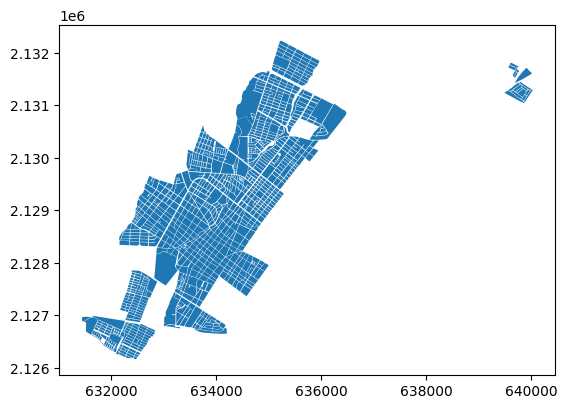

In [155]:
manzanas_inv2.plot()

In [48]:
manzanas_inv2.shape

(1016, 28)

## Tarea 
Tenemos 3 diferentes tipos de datos; AGEBs, Manzanas y datos puntuales de la infraestructura critica (escuelas, hospitales, etc).
La tarea será unificar todos los datos para que puedan estar al nivel de agebs. Se contabilizarán la cantiad de escuelas, hospitales, etc. por ageb y a partir de ahí podemos empezar a definir de mejor manera el modelo.

In [156]:
manzanas_inv2.drop(columns=["geometry","CVE_MZA"], inplace=True)
manzanas_inv = pd.DataFrame(manzanas_inv2)

In [157]:
manzanas_inv.head() 

,CVEGEO,CVE_AGEB,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,VPH_C_EL_P,VPH_EXSA_P,...,CICLOCAR_C,ALUMPUB_C,SEMAAUDI_C,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C
0,0600200010924024,0924,4,*,*,*,*,*,*,*,...,3,1,3,3,3,3,2,3,3,3
1,0600200011053024,1053,8,*,*,*,*,*,*,*,...,3,2,3,3,3,3,1,3,3,3
2,0600200011439031,1439,47,38.3,29.79,27.66,8.21,0.00,100,100,...,3,2,3,3,3,3,2,3,3,3
3,0600200011227021,1227,70,27.14,17.14,50,15.27,0.00,100,100,...,3,2,3,3,3,3,2,3,3,3
4,0600200011072010,1072,73,16.44,19.18,53.42,14.92,2.74,100,100,...,3,2,3,3,3,3,1,1,3,3


In [158]:
manzanas_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CVEGEO      1016 non-null   object
 1   CVE_AGEB    1016 non-null   object
 2   POBTOT      1016 non-null   object
 3   POB0_14_P   1016 non-null   object
 4   P15A29A_P   1016 non-null   object
 5   P30A59A_P   1016 non-null   object
 6   GRAPROES    1016 non-null   object
 7   P_CD_P      1016 non-null   object
 8   VPH_C_EL_P  1016 non-null   object
 9   VPH_EXSA_P  1016 non-null   object
 10  VPH_DREN_P  1016 non-null   object
 11  RECUCALL_C  1016 non-null   object
 12  RAMPAS_C    1016 non-null   object
 13  PASOPEAT_C  1016 non-null   object
 14  BANQUETA_C  1016 non-null   object
 15  CICLOVIA_C  1016 non-null   object
 16  CICLOCAR_C  1016 non-null   object
 17  ALUMPUB_C   1016 non-null   object
 18  SEMAAUDI_C  1016 non-null   object
 19  PARATRAN_C  1016 non-null   object
 20  DRENAJEP

In [159]:
manzanas_inv.replace(to_replace =["*"], value ="0", inplace=True)

In [160]:
# remove rows with 7,8 or 9 in the column RECUCALL_C
manzanas_inv = manzanas_inv[~manzanas_inv.RECUCALL_C.str.contains("7|8|9")]

print(manzanas_inv.shape)
manzanas_inv.head()

(1004, 26)


,CVEGEO,CVE_AGEB,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,VPH_C_EL_P,VPH_EXSA_P,...,CICLOCAR_C,ALUMPUB_C,SEMAAUDI_C,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C
0,0600200010924024,0924,4,0,0,0,0,0,0,0,...,3,1,3,3,3,3,2,3,3,3
1,0600200011053024,1053,8,0,0,0,0,0,0,0,...,3,2,3,3,3,3,1,3,3,3
2,0600200011439031,1439,47,38.3,29.79,27.66,8.21,0.00,100,100,...,3,2,3,3,3,3,2,3,3,3
3,0600200011227021,1227,70,27.14,17.14,50,15.27,0.00,100,100,...,3,2,3,3,3,3,2,3,3,3
4,0600200011072010,1072,73,16.44,19.18,53.42,14.92,2.74,100,100,...,3,2,3,3,3,3,1,1,3,3


In [162]:
manzanas_inv[manzanas_inv["CICLOCAR_C"] == 7]

,CVEGEO,CVE_AGEB,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,VPH_C_EL_P,VPH_EXSA_P,...,CICLOCAR_C,ALUMPUB_C,SEMAAUDI_C,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C


In [163]:
manzanas_inv["RECUCALL_C"].value_counts()


1    964
2     31
3      9
Name: RECUCALL_C, dtype: int64

In [164]:
# convert to numeric columns except CVEGEO, CVE_AGEB, CVE_MZA

columns_to_convert = manzanas_inv.columns.drop(["CVEGEO", "CVE_AGEB"])
columns_to_convert

manzanas_inv[columns_to_convert] = manzanas_inv[columns_to_convert].apply(pd.to_numeric)
manzanas_inv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1014
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CVEGEO      1004 non-null   object 
 1   CVE_AGEB    1004 non-null   object 
 2   POBTOT      1004 non-null   int64  
 3   POB0_14_P   1004 non-null   float64
 4   P15A29A_P   1004 non-null   float64
 5   P30A59A_P   1004 non-null   float64
 6   GRAPROES    1004 non-null   float64
 7   P_CD_P      1004 non-null   float64
 8   VPH_C_EL_P  1004 non-null   float64
 9   VPH_EXSA_P  1004 non-null   float64
 10  VPH_DREN_P  1004 non-null   float64
 11  RECUCALL_C  1004 non-null   int64  
 12  RAMPAS_C    1004 non-null   int64  
 13  PASOPEAT_C  1004 non-null   int64  
 14  BANQUETA_C  1004 non-null   int64  
 15  CICLOVIA_C  1004 non-null   int64  
 16  CICLOCAR_C  1004 non-null   int64  
 17  ALUMPUB_C   1004 non-null   int64  
 18  SEMAAUDI_C  1004 non-null   int64  
 19  PARATRAN_C  1004 non-null  

In [165]:
manzanas_inv["GRAPROES"]


0        0.00
1        0.00
2        8.21
3       15.27
4       14.92
        ...  
1010     9.74
1011     9.75
1012     7.35
1013    13.11
1014     7.93
Name: GRAPROES, Length: 1004, dtype: float64

In [166]:
columns_stat = {
  "POBTOT": 'sum',
  'POB0_14_P': 'mean', 
  'P15A29A_P':"mean", 
  'P30A59A_P':"mean",  
  'GRAPROES':"mean",   # Grado promedio de escolaridad 0 - 100
  'P_CD_P':"mean",     # Porcentaje de la población con discapacidad 0 - 100
  'VPH_C_EL_P':"mean", # Viviendas particulares habitadas que disponen de energía eléctrica    0 - 100
  'VPH_EXSA_P':"mean", # Viviendas particulares habitadas que disponen de excusado o sanitario 0 - 100
  'VPH_DREN_P':"sum",  # Viviendas particulares habitadas que disponen de drenaje 0 - 99999
  'RECUCALL_C':'sum',  # Pavimento de calles 1 | 2 | 3
  'RAMPAS_C':'sum', 
  'PASOPEAT_C':'sum', 
  'BANQUETA_C':'sum', 
  'CICLOVIA_C':'sum',
  'CICLOCAR_C':'sum', 
  'ALUMPUB_C':'sum', 
  'SEMAAUDI_C':'sum', 
  'PARATRAN_C':'sum', 
  'DRENAJEP_C':'sum',
  'TRANSCOL_C':'sum', 
  'ARBOLES_C':'sum', 
  'ACESOAUT_C':'sum', 
  'PUESSEMI_C':'sum', 
  'PUESAMBU_C':'sum'
}

In [167]:
manzanas_inv.head()

,CVEGEO,CVE_AGEB,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,VPH_C_EL_P,VPH_EXSA_P,...,CICLOCAR_C,ALUMPUB_C,SEMAAUDI_C,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C
0,0600200010924024,0924,4,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,3,1,3,3,3,3,2,3,3,3
1,0600200011053024,1053,8,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,3,2,3,3,3,3,1,3,3,3
2,0600200011439031,1439,47,38.30,29.79,27.66,8.21,0.00,100.0,100.0,...,3,2,3,3,3,3,2,3,3,3
3,0600200011227021,1227,70,27.14,17.14,50.00,15.27,0.00,100.0,100.0,...,3,2,3,3,3,3,2,3,3,3
4,0600200011072010,1072,73,16.44,19.18,53.42,14.92,2.74,100.0,100.0,...,3,2,3,3,3,3,1,1,3,3


In [178]:
manzanas_inv[manzanas_inv["CVE_AGEB"] == "0924"]["ALUMPUB_C"].value_counts(normalize=True)

2    0.80
1    0.16
3    0.04
Name: ALUMPUB_C, dtype: float64

In [168]:
agebs_inv = manzanas_inv.groupby("CVE_AGEB", as_index=False).agg(columns_stat)
agebs_inv

,CVE_AGEB,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,VPH_C_EL_P,VPH_EXSA_P,VPH_DREN_P,...,CICLOCAR_C,ALUMPUB_C,SEMAAUDI_C,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C
0,0273,74,6.349231,7.081538,13.980769,3.403077,3.540769,30.769231,29.486923,400.00,...,39,34,39,39,39,38,31,39,39,39
1,0318,1925,11.397551,17.568980,31.385102,10.333878,7.330000,85.303878,85.473878,4188.22,...,147,100,145,143,128,115,81,144,146,143
2,0322,2143,11.647736,17.747170,30.118113,11.442453,7.085472,88.486038,88.553396,4693.33,...,159,99,157,155,150,144,70,159,155,151
3,0362,2342,18.422286,21.292000,33.820000,9.617714,5.100857,91.145714,91.380857,3198.33,...,104,45,105,103,102,97,45,105,102,102
4,0411,1116,9.866053,17.035000,33.167105,11.912895,4.348947,81.578947,81.578947,3100.00,...,113,83,114,113,112,109,66,47,113,111
5,0676,2119,18.954194,19.591290,33.006774,10.056129,6.970000,96.261935,96.526129,3000.00,...,93,54,93,91,84,87,45,93,88,91
6,0680,1467,10.623214,20.527500,35.242500,12.790000,5.233571,97.937143,97.937143,2742.24,...,84,52,84,81,82,67,41,84,84,80
7,0708,1086,9.315185,16.823333,28.515185,11.042593,7.905556,80.899630,80.899630,2184.29,...,81,52,79,77,59,72,42,81,79,78
8,0712,2482,12.117353,21.365588,35.534118,10.973824,9.954412,93.872059,93.872059,3195.65,...,102,67,102,100,68,86,58,102,102,99
9,0727,4375,15.677234,19.972128,37.441277,10.088085,10.405106,95.260426,95.602766,4493.33,...,141,93,140,134,135,116,67,137,138,135


In [169]:
df_denue = df_with_columns[['ageb','class']]


In [170]:
df_denue = pd.DataFrame(df_denue.value_counts())
df_denue.reset_index(inplace=True)
df_denue.rename(columns={
  0:"count",
  "ageb":"CVE_AGEB",
  }, inplace=True)
df_denue


,CVE_AGEB,class,count
0,0746,escuela,26
1,1265,escuela,19
2,0750,escuela,17
3,0746,farmacia,14
4,0318,escuela,13
...,...,...,...
58,0680,hospital,1
59,0676,farmacia,1
60,0362,hospital,1
61,0362,farmacia,1


In [171]:
#df_denue = df_denue.pivot(index='ageb', columns='class', values='count')

df_denue1 = df_denue.pivot(index='CVE_AGEB', columns='class', values='count')
df_denue1.reset_index(inplace=True)
df_denue1.replace(to_replace =[np.nan], value ="0", inplace=True)
df_denue1

class,CVE_AGEB,escuela,farmacia,hospital
0,0273,1.0,0,0
1,0318,13.0,6.0,0
2,0322,13.0,3.0,3.0
3,0362,4.0,1.0,1.0
4,0411,12.0,2.0,0
5,0676,9.0,1.0,0
6,0680,12.0,2.0,1.0
7,0708,12.0,0,4.0
8,0712,11.0,3.0,1.0
9,0727,3.0,4.0,0


In [172]:
denue_inv = agebs_inv.merge(df_denue1, on="CVE_AGEB", how="left")
denue_inv

,CVE_AGEB,POBTOT,POB0_14_P,P15A29A_P,P30A59A_P,GRAPROES,P_CD_P,VPH_C_EL_P,VPH_EXSA_P,VPH_DREN_P,...,PARATRAN_C,DRENAJEP_C,TRANSCOL_C,ARBOLES_C,ACESOAUT_C,PUESSEMI_C,PUESAMBU_C,escuela,farmacia,hospital
0,0273,74,6.349231,7.081538,13.980769,3.403077,3.540769,30.769231,29.486923,400.00,...,39,39,38,31,39,39,39,1.0,0,0
1,0318,1925,11.397551,17.568980,31.385102,10.333878,7.330000,85.303878,85.473878,4188.22,...,143,128,115,81,144,146,143,13.0,6.0,0
2,0322,2143,11.647736,17.747170,30.118113,11.442453,7.085472,88.486038,88.553396,4693.33,...,155,150,144,70,159,155,151,13.0,3.0,3.0
3,0362,2342,18.422286,21.292000,33.820000,9.617714,5.100857,91.145714,91.380857,3198.33,...,103,102,97,45,105,102,102,4.0,1.0,1.0
4,0411,1116,9.866053,17.035000,33.167105,11.912895,4.348947,81.578947,81.578947,3100.00,...,113,112,109,66,47,113,111,12.0,2.0,0
5,0676,2119,18.954194,19.591290,33.006774,10.056129,6.970000,96.261935,96.526129,3000.00,...,91,84,87,45,93,88,91,9.0,1.0,0
6,0680,1467,10.623214,20.527500,35.242500,12.790000,5.233571,97.937143,97.937143,2742.24,...,81,82,67,41,84,84,80,12.0,2.0,1.0
7,0708,1086,9.315185,16.823333,28.515185,11.042593,7.905556,80.899630,80.899630,2184.29,...,77,59,72,42,81,79,78,12.0,0,4.0
8,0712,2482,12.117353,21.365588,35.534118,10.973824,9.954412,93.872059,93.872059,3195.65,...,100,68,86,58,102,102,99,11.0,3.0,1.0
9,0727,4375,15.677234,19.972128,37.441277,10.088085,10.405106,95.260426,95.602766,4493.33,...,134,135,116,67,137,138,135,3.0,4.0,0


In [173]:
denue_inv.to_csv("data/denue_inv.csv", index=False)
